In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import KBinsDiscretizer  
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [3]:
data = pd.read_csv("PEP1.csv", sep=',')
print("Shape of data set is: ", data.shape)
df = data

Shape of data set is:  (1460, 81)


In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
x = pd.Series([df[i].value_counts() for i in df.columns], index = df.columns)
y = pd.concat([df.isnull().any(), df.dtypes, x] , axis=1, keys=["IsNull","Type","Values"])
z = y.loc[y['IsNull'] == True]
print(z.index.tolist())
print(len(z.index.tolist()))#We have null values so more steps are required

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
19


In [6]:
z

,IsNull,Type,Values
LotFrontage,True,float64,60.0 143 70.0 70 80.0 69 50.0 ...
Alley,True,object,"Grvl 50 Pave 41 Name: Alley, dtype: int64"
MasVnrType,True,object,None 864 BrkFace 445 Stone 128 B...
MasVnrArea,True,float64,0.0 861 72.0 8 180.0 8 108.0 ...
BsmtQual,True,object,TA 649 Gd 618 Ex 121 Fa 35 Name: ...
BsmtCond,True,object,TA 1311 Gd 65 Fa 45 Po 2 Na...
BsmtExposure,True,object,No 953 Av 221 Gd 134 Mn 114 Name: ...
BsmtFinType1,True,object,Unf 430 GLQ 418 ALQ 220 BLQ 148 Re...
BsmtFinType2,True,object,Unf 1256 Rec 54 LwQ 46 BLQ 3...
Electrical,True,object,SBrkr 1334 FuseA 94 FuseF 27 Fuse...


In [7]:
#Or Other way to find null data
df.isnull().sum().sort_values(ascending= False).head(19)

#There are 1460 total so we can drop the column(Features) with plenty of missing data
#df = df.drop(['PoolQC','MiscFeature','Alley','Fence','LotFrontage'],axis=1)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [8]:
df.nunique().sort_values(ascending= False).head(20)
#variables with a small number of unique values, which may indicate that they are categorical variables.

Id               1460
LotArea          1073
GrLivArea         861
BsmtUnfSF         780
1stFlrSF          753
TotalBsmtSF       721
SalePrice         663
BsmtFinSF1        637
GarageArea        441
2ndFlrSF          417
MasVnrArea        327
WoodDeckSF        274
OpenPorchSF       202
BsmtFinSF2        144
EnclosedPorch     120
YearBuilt         112
LotFrontage       110
GarageYrBlt        97
ScreenPorch        76
YearRemodAdd       61
dtype: int64

In [9]:
z = df.nunique()
z_list=[]
for ind, val in z.iteritems():
    z_list.append(ind)


In [10]:
print(z_list)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functiol', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'F

In [11]:
df.shape

(1460, 81)

In [12]:
categorical_features = (df.select_dtypes(include=['object']).columns.values)
print("These are the Categorical data that we need to convert to numerical data\n",categorical_features)
print(len(categorical_features))

These are the Categorical data that we need to convert to numerical data
 ['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual' 'Functiol'
 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual' 'GarageCond'
 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType' 'SaleCondition']
43


In [13]:
c_df = df.select_dtypes(include=['object'])


In [14]:
c_df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [15]:
(c_df.isnull().sum()/len(c_df)*100).sort_values(ascending= False).head(19)


PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtQual         2.534247
BsmtCond         2.534247
MasVnrType       0.547945
Electrical       0.068493
Condition2       0.000000
Condition1       0.000000
Neighborhood     0.000000
dtype: float64

In [16]:
#There are 1460 total so we can drop the column(Features) with plenty of missing data
#we can discourage variables which have more than 15% of missing values
c_df = c_df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1)

#data = data.drop((missing_data[missing_data["Percentage"] > 0.05]).index,1)

In [17]:
c_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functiol,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [18]:
for col in c_df:
    c_df[col].fillna(c_df[col].mode()[0],inplace=True)


In [19]:
(c_df.isnull().sum()/len(c_df)*100).sort_values(ascending= False).head(19)


SaleCondition    0.0
Condition2       0.0
MasVnrType       0.0
Exterior2nd      0.0
Exterior1st      0.0
RoofMatl         0.0
RoofStyle        0.0
HouseStyle       0.0
BldgType         0.0
Condition1       0.0
SaleType         0.0
Neighborhood     0.0
LandSlope        0.0
LotConfig        0.0
Utilities        0.0
LandContour      0.0
LotShape         0.0
Street           0.0
ExterQual        0.0
dtype: float64

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SaleCondition', ylabel='count'>

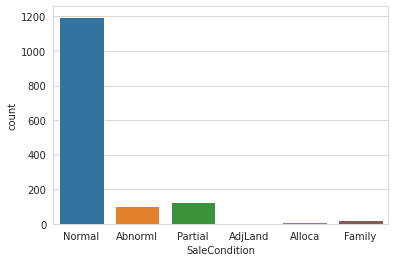

In [20]:
sns.countplot(c_df['SaleCondition']) 

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Foundation', ylabel='count'>

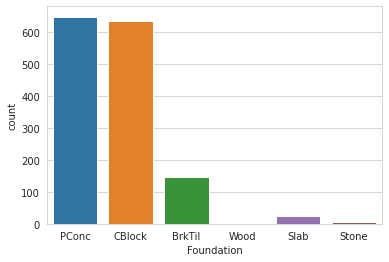

In [21]:
sns.countplot(c_df['Foundation']) 

In [22]:
from scipy.stats import chi2_contingency
# Create an empty list to store the p-values
p_values = []
# Iterate over the categorical columns
for col in c_df.columns:
    # Create a contingency table for the column
    cont_table = pd.crosstab(c_df[col], df['SalePrice'])
    # Calculate the chi-square statistic and p-value
    chi2, p, dof, ex = chi2_contingency(cont_table)
    # Append the p-value to the list
    p_values.append(p)
# Convert the list of p-values to a Pandas Series
p_values = pd.Series(p_values, index=c_df.columns)
# Print the significant features
#print(p_values[p_values < 0.05])

In [23]:
c_list = p_values[p_values < 0.05].index.tolist()
print(c_list)
print(len(c_list))

['MSZoning', 'Street', 'LotShape', 'LotConfig', 'Neighborhood', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'Heating', 'CentralAir', 'KitchenQual', 'GarageFinish', 'SaleType', 'SaleCondition']
18


In [24]:
c_final = c_df[c_list]

In [25]:
c_final.head()

,MSZoning,Street,LotShape,LotConfig,Neighborhood,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,Heating,CentralAir,KitchenQual,GarageFinish,SaleType,SaleCondition
0,RL,Pave,Reg,Inside,CollgCr,BrkFace,Gd,TA,PConc,Gd,TA,No,GasA,Y,Gd,RFn,WD,Normal
1,RL,Pave,Reg,FR2,Veenker,None,TA,TA,CBlock,Gd,TA,Gd,GasA,Y,TA,RFn,WD,Normal
2,RL,Pave,IR1,Inside,CollgCr,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GasA,Y,Gd,RFn,WD,Normal
3,RL,Pave,IR1,Corner,Crawfor,None,TA,TA,BrkTil,TA,Gd,No,GasA,Y,Gd,Unf,WD,Abnorml
4,RL,Pave,IR1,FR2,NoRidge,BrkFace,Gd,TA,PConc,Gd,TA,Av,GasA,Y,Gd,RFn,WD,Normal


In [26]:
le = LabelEncoder()
hot_enc = OneHotEncoder(dtype=np.int, sparse=True)#Or Use dummies #to convert categorical to numerical when order is NOT important

#df.address=le.fit_transform(df.address) #nominal
#df.sex=le.fit_transform(df.sex) #nominal

#df.famsize=le.fit_transform(df.famsize) #ordinal

categorical_features = np.delete(categorical_features,np.where(categorical_features =='famsize'))
#cat = list(np.array(['LE3','GT3']).reshape(1,2))
cat = list(np.array(['LE3','GT3']).reshape(1,2))
oe = OrdinalEncoder(categories=cat)
df.famsize=oe.fit_transform(df.famsize.values.reshape(-1, 1))

#df.Pstatus=le.fit_transform(df.Pstatus) #nominal
#df.paid=le.fit_transform(df.paid) #nominal
#df.activities=le.fit_transform(df.activities) #nominal
#df.higher=le.fit_transform(df.higher) #nominal
#df.internet=le.fit_transform(df.internet) #nominal
#df.romantic=le.fit_transform(df.romantic) #nominal

for col in categorical_features:
    dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat((df, dummies), axis='columns').drop(col, axis=1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


AttributeError: 'DataFrame' object has no attribute 'famsize'

In [ ]:
#numerical

In [12]:
numerical_features = df.select_dtypes(include = ['float64', 'int64']).columns.values
print(numerical_features)
print(len(numerical_features))


['Id' 'MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchebvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'SalePrice']
38


In [13]:
n_df = df.select_dtypes(include=['float64', 'int64'])


In [14]:
n_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [15]:
#Or Other way to find null data
n_df.isnull().sum().sort_values(ascending= False).head(19)
#There are 1460 total so we can drop the column(Features) with plenty of missing data
#df = df.drop(['PoolQC','MiscFeature','Alley','Fence','LotFrontage'],axis=1)

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
BsmtFinSF1        0
LowQualFinSF      0
2ndFlrSF          0
1stFlrSF          0
TotalBsmtSF       0
BsmtUnfSF         0
BsmtFinSF2        0
SalePrice         0
BsmtFullBath      0
YearRemodAdd      0
YearBuilt         0
OverallCond       0
OverallQual       0
LotArea           0
MSSubClass        0
GrLivArea         0
dtype: int64

In [16]:
from sklearn.impute import SimpleImputer
# Mean Imputation
n_df_fixed = n_df.copy()
mean_imputer = SimpleImputer(strategy='mean')

for col in ['LotFrontage','GarageYrBlt','MasVnrArea']:
    n_df_fixed[col] = mean_imputer.fit_transform(n_df_fixed[col].values.reshape(-1,1))


In [17]:
n_df_fixed.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [18]:
n_df_fixed.isnull().sum().sort_values(ascending= False).head(19)


SalePrice       0
BsmtFinSF1      0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
TotalBsmtSF     0
BsmtUnfSF       0
BsmtFinSF2      0
MasVnrArea      0
YrSold          0
YearRemodAdd    0
YearBuilt       0
OverallCond     0
OverallQual     0
LotArea         0
LotFrontage     0
MSSubClass      0
BsmtFullBath    0
dtype: int64

In [19]:
from scipy.stats import skew
n_df_fixed.skew(axis = 0, skipna = True)

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.384950
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.676412
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchebvGr        4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.668175
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>],
       [<AxesSubplot:title={'center':'BsmtHalfBath'

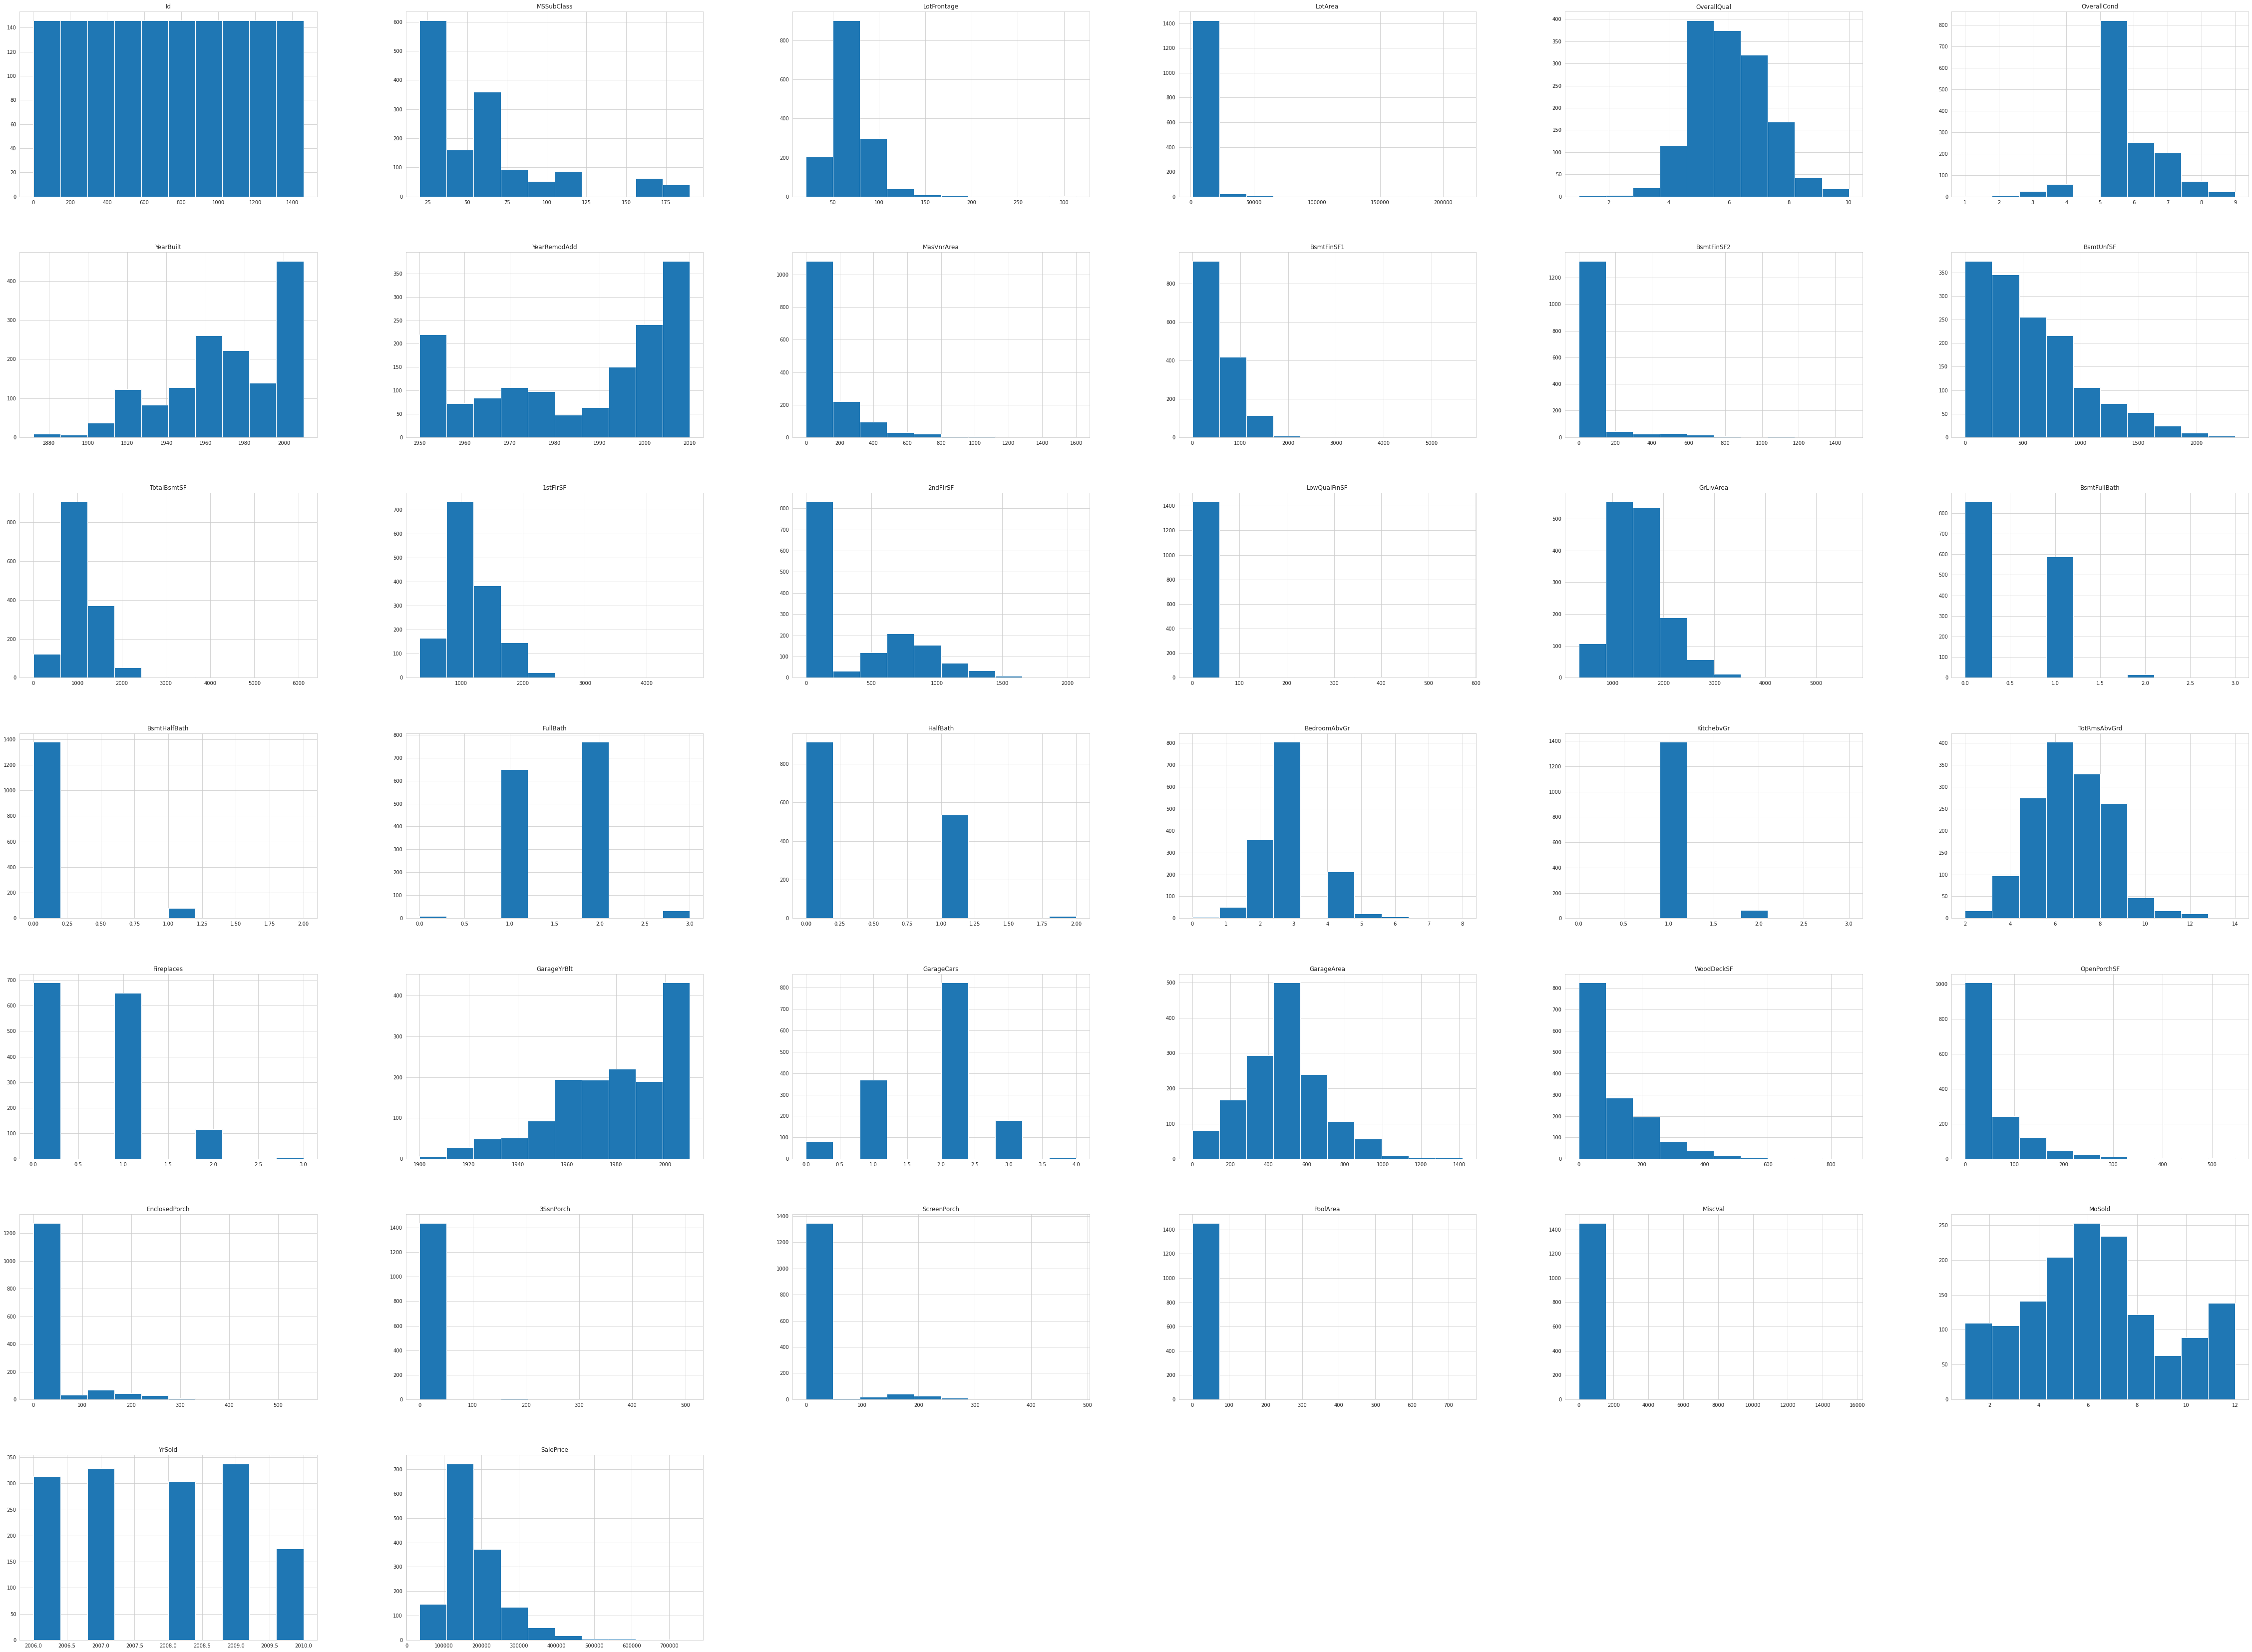

In [20]:
n_df_fixed.hist(figsize=(80, 60))

Text(0.5, 1.0, 'Correlation Heatmap')

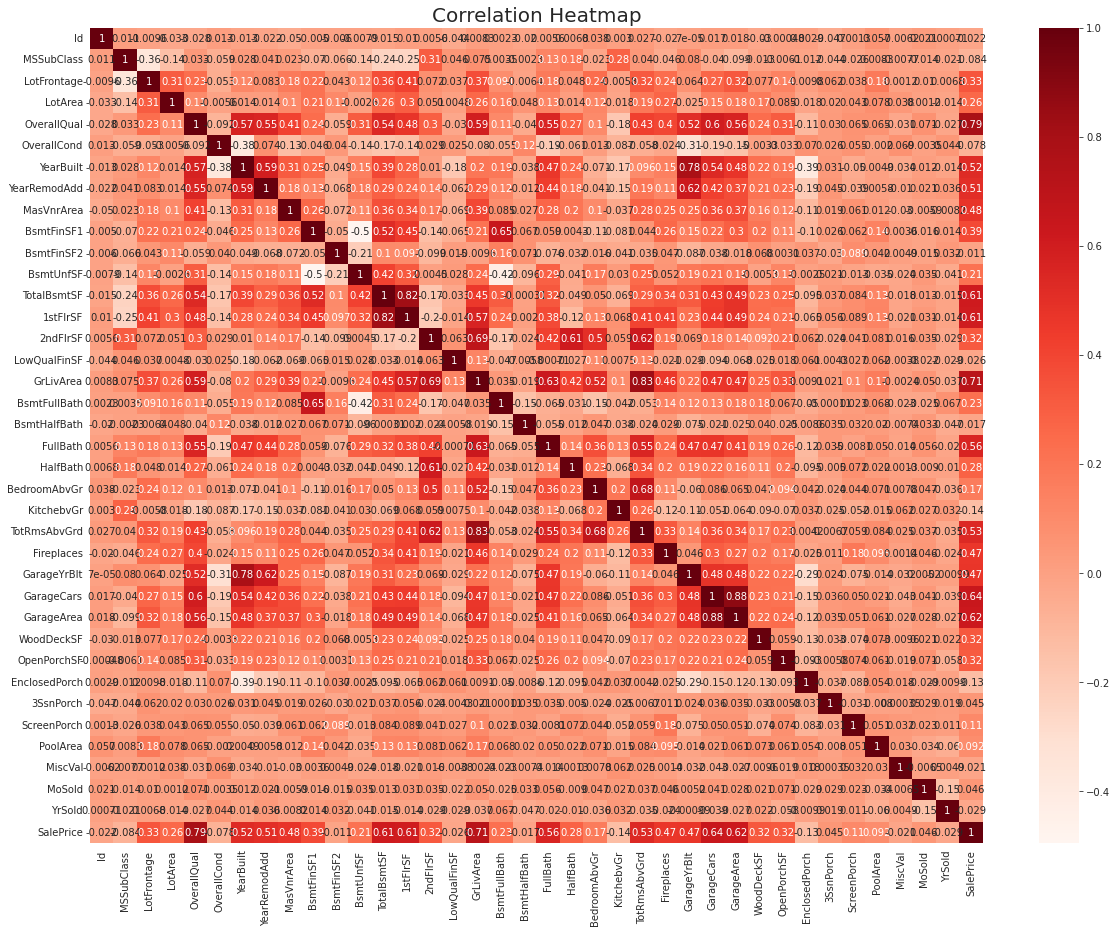

In [21]:
#Removing Catogaries with low correlation value
# see correlation between variables through a correlation heatmap
n_cor_matrix = n_df_fixed.corr()
plt.figure(figsize=(20,15))
sns.heatmap(n_cor_matrix, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

In [22]:
to_keep = [column for column in n_cor_matrix.columns if abs(n_cor_matrix[column]['SalePrice']) > 0.5]


In [23]:
print(to_keep)

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']


In [30]:
print(type(n_df_fixed))
print(type(n_df_fixed['YearBuilt']))
print(type(n_df_fixed['OverallQual']))
print(type(n_df_fixed[['OverallQual','YearBuilt']]))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


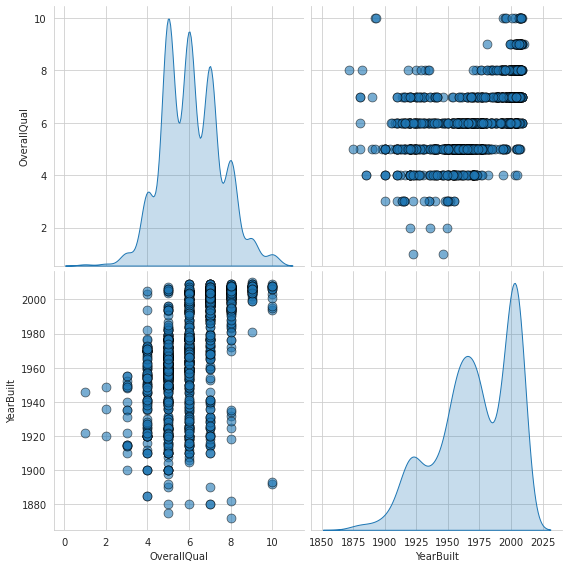

In [33]:
#sns.pairplot(n_df_fixed, hue = 'C', diag_kind = 'kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size = 4)
sns.pairplot(n_df_fixed[['OverallQual','YearBuilt']], diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size = 4)

In [ ]:
n_final = n_df_fixed[to_keep]

In [ ]:
n_final.head()

In [ ]:
print(c_final.shape)
print(n_final.shape)

In [ ]:
df_concat = pd.concat([c_final, n_final], axis=1)

In [ ]:
print(df_concat.shape)

In [ ]:
df_concat.head()

In [ ]:
df_concat.boxplot(figsize=(10, 5))

In [ ]:
df_concat.describe()

In [ ]:
# Calculate the IQR for each column
Q1 = df_concat.quantile(0.25)
Q3 = df_concat.quantile(0.75)
IQR = Q3 - Q1

# Identify the variables with outliers
outliers = df_concat[((df_concat < (Q1 - 1.5 * IQR)) | (df_concat > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print the variables with outliers
print(outliers.columns.tolist())
#To find the variables with outliers, you can use the apply method to apply a function to each column of the DataFrame. 
#This function can calculate the interquartile range (IQR) of the column, which is the difference between the 75th percentile and the 25th percentile. You can then use this IQR to identify values that are outside of the range of the box plot.

In [ ]:
#Detecting outliers with scatter plot of GrLivArea with SalePrice
print(df_concat.shape)
sns.scatterplot(y="SalePrice", x="GrLivArea", data=df_concat)